In [ ]:
#!python2 --version
!python3 --version

Python 3.7.12


# **Music Feature Extraction**

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import mlab
import IPython.display as ipd

In [2]:
#Read audio file
audio_path='/Users/kashi/BioAcoustic/PC0001_1178.wav'
audio_np, sr =librosa.load(audio_path, sr=None) # audio_np: data - sr:sampling rate - Question:duration: when to use? 
# get info about data/file
print(type(audio_np), type(sr)) 
print(sr)
audio_length=len(audio_np) # data points
print(audio_length)

<class 'numpy.ndarray'> <class 'int'>
44100
53435520


In [ ]:
#Play audio
ipd.Audio(audio_path)

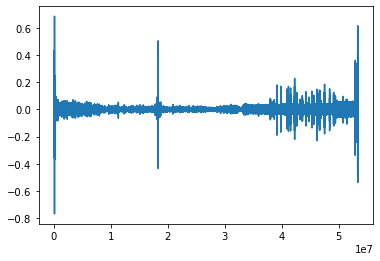

In [3]:
# display waveform with matplotlib
import matplotlib.pyplot as plt
plt.plot(audio_np)

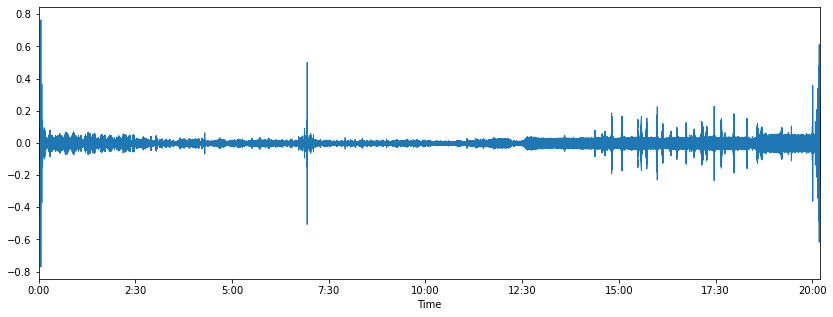

In [4]:
#display waveform
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio_np, sr=sr) # ???? QUESTION --> THE SAMPLING RATE TO TIME?

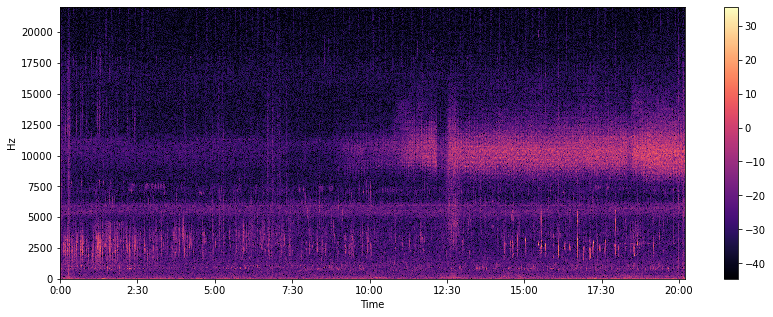

In [6]:
#display Spectrogram overall
X = librosa.stft(audio_np)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
#plt.ylim((0,500))
#plt.xlim((0,5000))
plt.colorbar()

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
#plt.xlim((0,20))
plt.ylim((0,5000))
plt.colorbar()

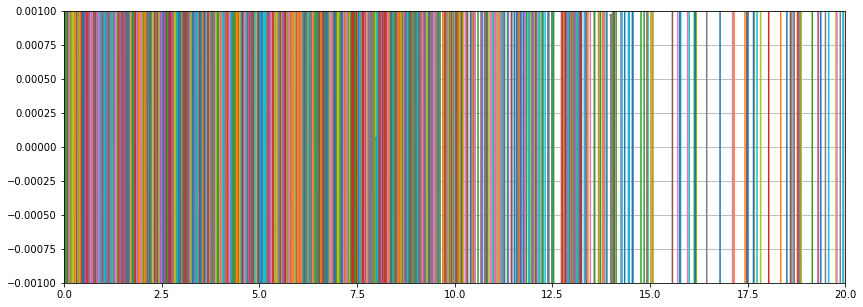

In [8]:
plt.figure(figsize=(14, 5))
plt.plot(Xdb, '.-')
plt.xlim((0,20))
plt.ylim((-0.001,0.001))
plt.grid()

In [ ]:
# make a dataframe out of the audio numpy array
audio_pd=pd.DataFrame(audio_np).T
audio_pd.head()

In [ ]:
params = {'NFFT':1024, 'Fs':2000, 'noverlap':0}
P, freqs, bins = mlab.specgram(audio_np, **params)

In [ ]:
print 'Dimensions of P:', P.shape
print 'Dimensions of freqs:', freqs.shape
print 'Dimensions of bins:' , bins.shape

In [ ]:
pd.DataFrame(P)[0:5]

In [ ]:
#display Spectrogram
X = librosa.stft(P[1])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
#display Spectrogram
X = librosa.stft(audio_np)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
b=1/float(sr)  # 1/sampling rate = dt 
print(b)
c=b*float(audio_length)
print(c)

In [ ]:
type(float(audio_length))
type(c)

(128, 104367)


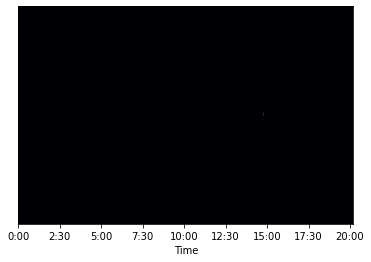

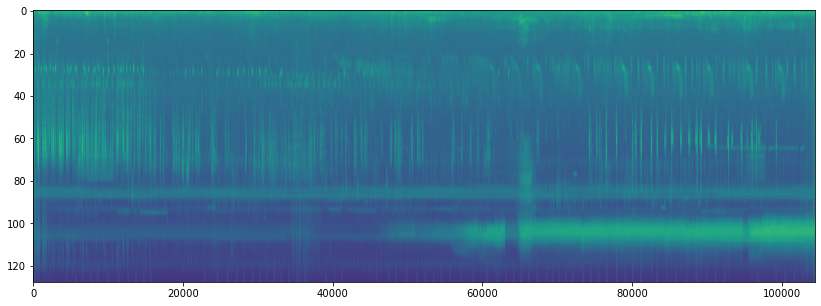

In [9]:

melspectrogram = librosa.feature.melspectrogram(audio_np, sr=sr)
print(melspectrogram.shape)
#Displaying  the MFCCs:
librosa.display.specshow(melspectrogram, sr=sr, x_axis='time')
plt.figure(figsize=(14, 5))
plt.imshow(np.log(melspectrogram),aspect='auto')

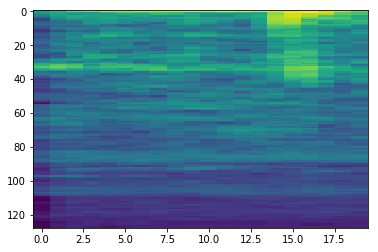

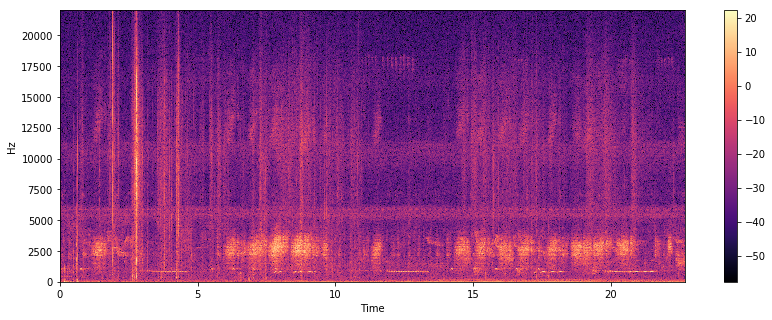

In [ ]:
import numpy as np
n0=0
n1=1000000
plt.imshow(np.log(melspectrogram),aspect='auto')
#display Spectrogram
X = librosa.stft(audio_np[n0:n1])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

(128, 104367)


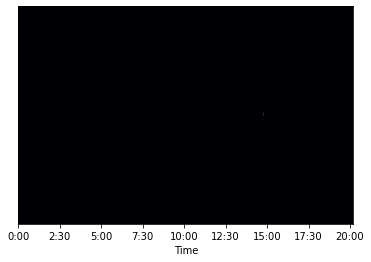

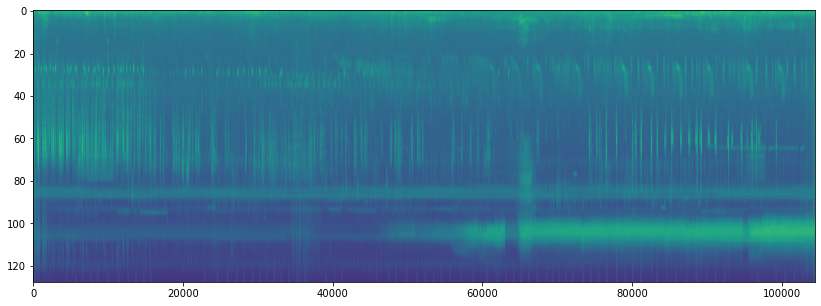

In [12]:
melspectrogram = librosa.feature.melspectrogram(audio_np, sr=sr)
print(melspectrogram.shape)
#Displaying  the MFCCs:
librosa.display.specshow(melspectrogram, sr=sr, x_axis='time')
plt.figure(figsize=(14, 5))
plt.imshow(np.log(melspectrogram),aspect='auto')

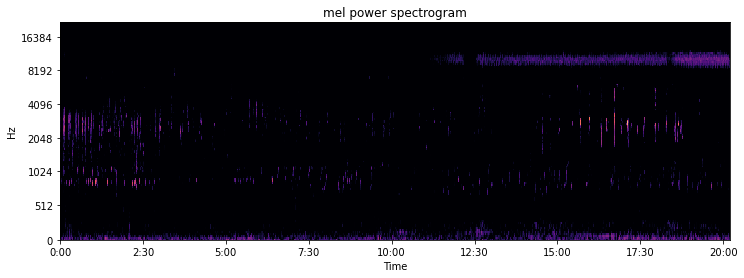

In [36]:
S = librosa.feature.melspectrogram(audio_np, sr=sr, n_mels=128)
log_S = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.title('mel power spectrogram')
#plt.colorbar(format='%+02.0f dB')

#plt.tight_layout()
plt.imshow(np.log(melspectrogram),aspect='auto')

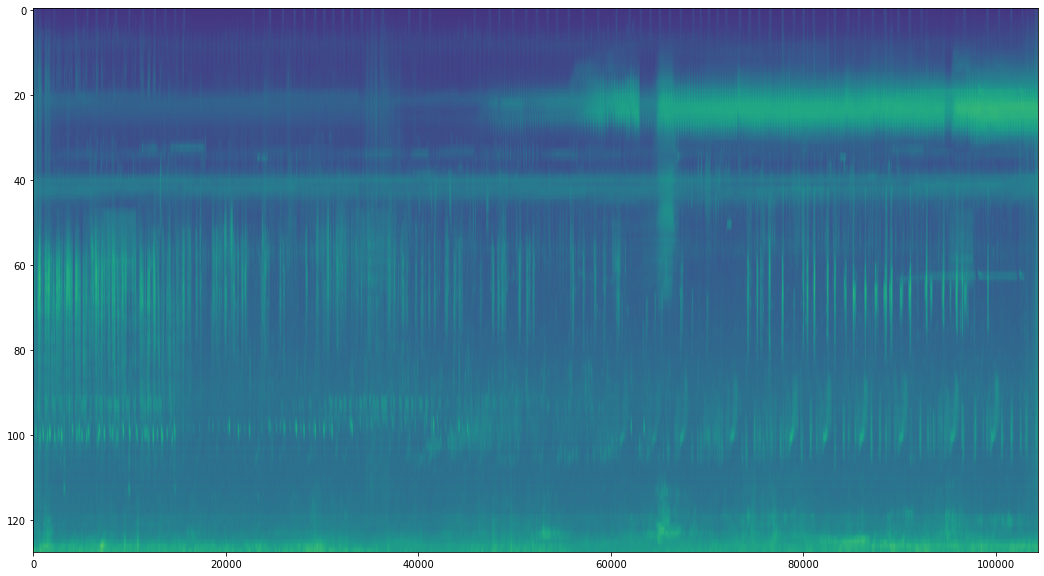

In [43]:
plt.figure(figsize=(18,10))
image= plt.imshow(np.flip(np.log(melspectrogram), axis=0),aspect='auto')

In [53]:
image.figure.savefig('/Users/kashi/BioAcoustic/PC0001_1178_Melspect_log.png', dpi=1000)

/Users/kashi/opt/anaconda3/lib/python3.8/site-packages/librosa/filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


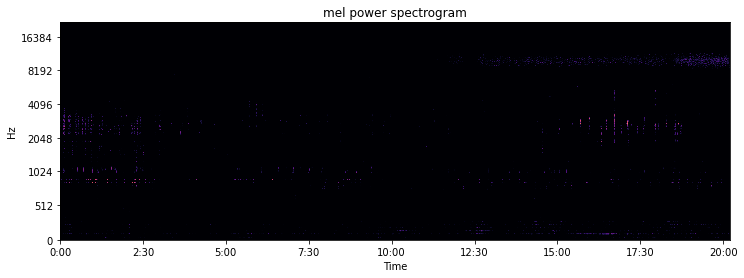

In [46]:
S = librosa.feature.melspectrogram(audio_np, sr=sr, n_mels=1024)
log_S = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.title('mel power spectrogram')
#plt.colorbar(format='%+02.0f dB')

#plt.tight_layout()
plt.imshow(np.log(melspectrogram),aspect='auto')

In [54]:
melspectrogram = librosa.feature.melspectrogram(audio_np, sr=sr)

(2000.0, 4000.0)

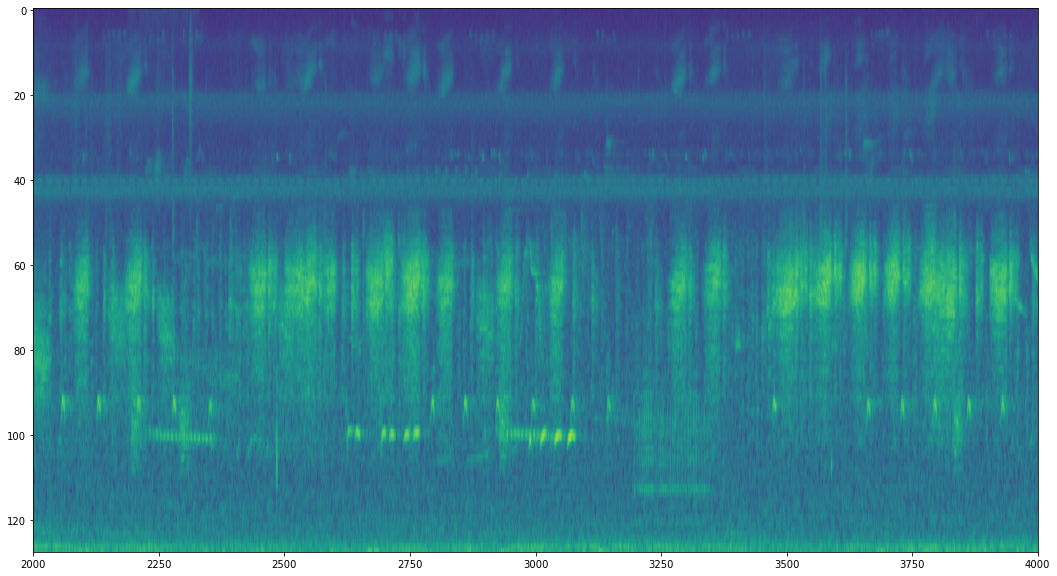

In [58]:
plt.figure(figsize=(18,10))
image= plt.imshow(np.flip(np.log(melspectrogram), axis=0),aspect='auto')

plt.xlim((2000,4000))

In [ ]:
image.figure.savefig('/Users/kashi/BioAcoustic/PC0001_1178_Melspect_log.png', dpi=1000)